In [1]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

In [6]:
# Load the Excel file into a DataFrame
df = pd.read_excel('good_file.xlsx')


In [7]:
# prompt: show the cloumns head

print(df.columns.values)


['caption' 'commentsCount' 'inputUrl' 'isSponsored' 'likesCount'
 'locationId' 'locationName' 'ownerFullName' 'ownerUsername' 'timestamp'
 'type' 'url' 'videoDuration' 'videoPlayCount' 'videoUrl' 'videoViewCount'
 'likesCount30days' 'commentsCount30days' 'List of Hashtags'
 'Number of Hashtags']


In [8]:
# prompt: info

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36357 entries, 0 to 36356
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   caption              36247 non-null  object        
 1   commentsCount        36357 non-null  int64         
 2   inputUrl             36357 non-null  object        
 3   isSponsored          36357 non-null  bool          
 4   likesCount           30329 non-null  float64       
 5   locationId           12979 non-null  float64       
 6   locationName         12956 non-null  object        
 7   ownerFullName        33925 non-null  object        
 8   ownerUsername        36357 non-null  object        
 9   timestamp            36357 non-null  datetime64[ns]
 10  type                 36357 non-null  object        
 11  url                  36357 non-null  object        
 12  videoDuration        149 non-null    float64       
 13  videoPlayCount       0 non-null

In [9]:
# prompt: shape

print(df.shape)


(36357, 20)


In [10]:
# prompt: drop unnecessary columns

# Drop unnecessary columns
df = df.drop(['locationId', 'videoDuration', 'videoPlayCount','caption','ownerFullName','ownerUsername','url'], axis=1)

# Print the updated DataFrame
print(df.columns.values)


['commentsCount' 'inputUrl' 'isSponsored' 'likesCount' 'locationName'
 'timestamp' 'type' 'videoUrl' 'videoViewCount' 'likesCount30days'
 'commentsCount30days' 'List of Hashtags' 'Number of Hashtags']


In [11]:
# Fill missing values (if any)
df.fillna(0, inplace=True)  # You might want to use a different strategy depending on your data


In [12]:
# Now, you can check the data types of all columns
print(df.dtypes)

commentsCount                   int64
inputUrl                       object
isSponsored                      bool
likesCount                    float64
locationName                   object
timestamp              datetime64[ns]
type                           object
videoUrl                       object
videoViewCount                float64
likesCount30days                int64
commentsCount30days             int64
List of Hashtags               object
Number of Hashtags              int64
dtype: object


In [13]:
df.head()

,commentsCount,inputUrl,isSponsored,likesCount,locationName,timestamp,type,videoUrl,videoViewCount,likesCount30days,commentsCount30days,List of Hashtags,Number of Hashtags
0,0,https://www.instagram.com/explore/tags/landscape,False,0.0,"Glastonbury Tor, Somerset",2024-02-17 05:42:07,Image,0,0.0,36,1,#landscapephotography#landscape#instaworld_lov...,31
1,0,https://www.instagram.com/explore/tags/goals,False,3.0,Ramakrishna Mission Vivekananda University-Ent...,2024-02-17 05:43:09,Image,0,0.0,128,4,#hardwork#motivation#fitness#success#workout#d...,31
2,0,https://www.instagram.com/explore/tags/swag,False,2.0,247 Park,2024-02-17 05:42:33,Image,0,0.0,58,3,#formal#swag#foryou#photo#attitude#shoot#pose#...,31
3,0,https://www.instagram.com/explore/tags/landscape,False,0.0,浅草,2024-02-17 05:42:05,Sidecar,0,0.0,-1,0,#tokyo#landscape#ふぐ#福#nan#nan#nan#nan#nan#nan#...,31
4,0,https://www.instagram.com/explore/tags/swag,False,0.0,0,2024-02-17 05:42:23,Image,0,0.0,137,0,#photo#photography#naturephotography#photograp...,31


In [14]:
# Define a function to extract hashtags from inputUrl without brackets
def extract_hashtags(url):
    # Extract hashtags from the URL using regular expressions
    hashtags = re.findall(r'\/explore\/tags\/(\w+)', url)
    # Join the extracted hashtags into a string without brackets
    hashtags_without_brackets = ','.join(hashtags)
    return hashtags_without_brackets

# Apply the function to the inputUrl column to create a new column for extracted hashtags
df['Extracted Hashtags'] = df['inputUrl'].apply(extract_hashtags)

# Print the DataFrame with the extracted hashtags
print(df[['inputUrl', 'Extracted Hashtags']])

                                               inputUrl Extracted Hashtags
0      https://www.instagram.com/explore/tags/landscape          landscape
1          https://www.instagram.com/explore/tags/goals              goals
2           https://www.instagram.com/explore/tags/swag               swag
3      https://www.instagram.com/explore/tags/landscape          landscape
4           https://www.instagram.com/explore/tags/swag               swag
...                                                 ...                ...
36352      https://www.instagram.com/explore/tags/girls              girls
36353    https://www.instagram.com/explore/tags/holiday            holiday
36354    https://www.instagram.com/explore/tags/holiday            holiday
36355    https://www.instagram.com/explore/tags/holiday            holiday
36356       https://www.instagram.com/explore/tags/body               body

[36357 rows x 2 columns]


In [15]:
df.head()

,commentsCount,inputUrl,isSponsored,likesCount,locationName,timestamp,type,videoUrl,videoViewCount,likesCount30days,commentsCount30days,List of Hashtags,Number of Hashtags,Extracted Hashtags
0,0,https://www.instagram.com/explore/tags/landscape,False,0.0,"Glastonbury Tor, Somerset",2024-02-17 05:42:07,Image,0,0.0,36,1,#landscapephotography#landscape#instaworld_lov...,31,landscape
1,0,https://www.instagram.com/explore/tags/goals,False,3.0,Ramakrishna Mission Vivekananda University-Ent...,2024-02-17 05:43:09,Image,0,0.0,128,4,#hardwork#motivation#fitness#success#workout#d...,31,goals
2,0,https://www.instagram.com/explore/tags/swag,False,2.0,247 Park,2024-02-17 05:42:33,Image,0,0.0,58,3,#formal#swag#foryou#photo#attitude#shoot#pose#...,31,swag
3,0,https://www.instagram.com/explore/tags/landscape,False,0.0,浅草,2024-02-17 05:42:05,Sidecar,0,0.0,-1,0,#tokyo#landscape#ふぐ#福#nan#nan#nan#nan#nan#nan#...,31,landscape
4,0,https://www.instagram.com/explore/tags/swag,False,0.0,0,2024-02-17 05:42:23,Image,0,0.0,137,0,#photo#photography#naturephotography#photograp...,31,swag


In [16]:
# prompt: drop inputurl column

df = df.drop('inputUrl', axis=1)


In [17]:
df.head()

,commentsCount,isSponsored,likesCount,locationName,timestamp,type,videoUrl,videoViewCount,likesCount30days,commentsCount30days,List of Hashtags,Number of Hashtags,Extracted Hashtags
0,0,False,0.0,"Glastonbury Tor, Somerset",2024-02-17 05:42:07,Image,0,0.0,36,1,#landscapephotography#landscape#instaworld_lov...,31,landscape
1,0,False,3.0,Ramakrishna Mission Vivekananda University-Ent...,2024-02-17 05:43:09,Image,0,0.0,128,4,#hardwork#motivation#fitness#success#workout#d...,31,goals
2,0,False,2.0,247 Park,2024-02-17 05:42:33,Image,0,0.0,58,3,#formal#swag#foryou#photo#attitude#shoot#pose#...,31,swag
3,0,False,0.0,浅草,2024-02-17 05:42:05,Sidecar,0,0.0,-1,0,#tokyo#landscape#ふぐ#福#nan#nan#nan#nan#nan#nan#...,31,landscape
4,0,False,0.0,0,2024-02-17 05:42:23,Image,0,0.0,137,0,#photo#photography#naturephotography#photograp...,31,swag


In [18]:
# prompt: convert name of extracted hashtags into hashtagsUsed

df = df.rename(columns={'Extracted Hashtags': 'hashtagsUsed'})
df.head()


,commentsCount,isSponsored,likesCount,locationName,timestamp,type,videoUrl,videoViewCount,likesCount30days,commentsCount30days,List of Hashtags,Number of Hashtags,hashtagsUsed
0,0,False,0.0,"Glastonbury Tor, Somerset",2024-02-17 05:42:07,Image,0,0.0,36,1,#landscapephotography#landscape#instaworld_lov...,31,landscape
1,0,False,3.0,Ramakrishna Mission Vivekananda University-Ent...,2024-02-17 05:43:09,Image,0,0.0,128,4,#hardwork#motivation#fitness#success#workout#d...,31,goals
2,0,False,2.0,247 Park,2024-02-17 05:42:33,Image,0,0.0,58,3,#formal#swag#foryou#photo#attitude#shoot#pose#...,31,swag
3,0,False,0.0,浅草,2024-02-17 05:42:05,Sidecar,0,0.0,-1,0,#tokyo#landscape#ふぐ#福#nan#nan#nan#nan#nan#nan#...,31,landscape
4,0,False,0.0,0,2024-02-17 05:42:23,Image,0,0.0,137,0,#photo#photography#naturephotography#photograp...,31,swag


In [19]:
# prompt: replace -ve value from whole dataset to 0

df.replace({-1:0}, inplace=True)
df.head()


,commentsCount,isSponsored,likesCount,locationName,timestamp,type,videoUrl,videoViewCount,likesCount30days,commentsCount30days,List of Hashtags,Number of Hashtags,hashtagsUsed
0,0,False,0.0,"Glastonbury Tor, Somerset",2024-02-17 05:42:07,Image,0,0.0,36,1,#landscapephotography#landscape#instaworld_lov...,31,landscape
1,0,False,3.0,Ramakrishna Mission Vivekananda University-Ent...,2024-02-17 05:43:09,Image,0,0.0,128,4,#hardwork#motivation#fitness#success#workout#d...,31,goals
2,0,False,2.0,247 Park,2024-02-17 05:42:33,Image,0,0.0,58,3,#formal#swag#foryou#photo#attitude#shoot#pose#...,31,swag
3,0,False,0.0,浅草,2024-02-17 05:42:05,Sidecar,0,0.0,0,0,#tokyo#landscape#ふぐ#福#nan#nan#nan#nan#nan#nan#...,31,landscape
4,0,False,0.0,0,2024-02-17 05:42:23,Image,0,0.0,137,0,#photo#photography#naturephotography#photograp...,31,swag


In [20]:
# Now, you can check the data types of all columns
print(df.dtypes)


commentsCount                   int64
isSponsored                      bool
likesCount                    float64
locationName                   object
timestamp              datetime64[ns]
type                           object
videoUrl                       object
videoViewCount                float64
likesCount30days                int64
commentsCount30days             int64
List of Hashtags               object
Number of Hashtags              int64
hashtagsUsed                   object
dtype: object


In [21]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 commentsCount          0
isSponsored            0
likesCount             0
locationName           0
timestamp              0
type                   0
videoUrl               0
videoViewCount         0
likesCount30days       0
commentsCount30days    0
List of Hashtags       0
Number of Hashtags     0
hashtagsUsed           0
dtype: int64


In [22]:
# Convert boolean column to integer (0 for False, 1 for True)
df['isSponsored'] = df['isSponsored'].astype(int)

# Verify the data type conversion
print(df.dtypes)

commentsCount                   int64
isSponsored                     int64
likesCount                    float64
locationName                   object
timestamp              datetime64[ns]
type                           object
videoUrl                       object
videoViewCount                float64
likesCount30days                int64
commentsCount30days             int64
List of Hashtags               object
Number of Hashtags              int64
hashtagsUsed                   object
dtype: object


In [23]:
# prompt: drop videourl column

df = df.drop('videoUrl', axis=1)


In [24]:
print(df.dtypes)

commentsCount                   int64
isSponsored                     int64
likesCount                    float64
locationName                   object
timestamp              datetime64[ns]
type                           object
videoViewCount                float64
likesCount30days                int64
commentsCount30days             int64
List of Hashtags               object
Number of Hashtags              int64
hashtagsUsed                   object
dtype: object


In [25]:
# Round float columns and then convert to integer
df['likesCount'] = df['likesCount'].round().astype(int)
df['videoViewCount'] = df['videoViewCount'].round().astype(int)

# Verify the data type conversion
print(df.dtypes)

commentsCount                   int64
isSponsored                     int64
likesCount                      int64
locationName                   object
timestamp              datetime64[ns]
type                           object
videoViewCount                  int64
likesCount30days                int64
commentsCount30days             int64
List of Hashtags               object
Number of Hashtags              int64
hashtagsUsed                   object
dtype: object


In [26]:

# Extract date-related features from timestamp
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second

# Drop the original timestamp column if needed
# df.drop('timestamp', axis=1, inplace=True)

# Verify the changes
print(df.head())

print(df.dtypes)

   commentsCount  isSponsored  likesCount  \
0              0            0           0   
1              0            0           3   
2              0            0           2   
3              0            0           0   
4              0            0           0   

                                        locationName           timestamp  \
0                          Glastonbury Tor, Somerset 2024-02-17 05:42:07   
1  Ramakrishna Mission Vivekananda University-Ent... 2024-02-17 05:43:09   
2                                           247 Park 2024-02-17 05:42:33   
3                                                 浅草 2024-02-17 05:42:05   
4                                                  0 2024-02-17 05:42:23   

      type  videoViewCount  likesCount30days  commentsCount30days  \
0    Image               0                36                    1   
1    Image               0               128                    4   
2    Image               0                58                    3

In [27]:
# prompt: drop timestamp column

df.drop('timestamp', axis=1, inplace=True)


In [28]:
print(df.dtypes)

commentsCount           int64
isSponsored             int64
likesCount              int64
locationName           object
type                   object
videoViewCount          int64
likesCount30days        int64
commentsCount30days     int64
List of Hashtags       object
Number of Hashtags      int64
hashtagsUsed           object
year                    int32
month                   int32
day                     int32
hour                    int32
minute                  int32
second                  int32
dtype: object


In [29]:
# Label Encoding for 'locationName' and 'type'
label_encoder = LabelEncoder()
df['locationName_encoded'] = label_encoder.fit_transform(df['locationName'].astype(str))
df['type_encoded'] = label_encoder.fit_transform(df['type'])

In [30]:
print(df.shape)

(36357, 19)


In [31]:
df.head()

,commentsCount,isSponsored,likesCount,locationName,type,videoViewCount,likesCount30days,commentsCount30days,List of Hashtags,Number of Hashtags,hashtagsUsed,year,month,day,hour,minute,second,locationName_encoded,type_encoded
0,0,0,0,"Glastonbury Tor, Somerset",Image,0,36,1,#landscapephotography#landscape#instaworld_lov...,31,landscape,2024,2,17,5,42,7,2360,0
1,0,0,3,Ramakrishna Mission Vivekananda University-Ent...,Image,0,128,4,#hardwork#motivation#fitness#success#workout#d...,31,goals,2024,2,17,5,43,9,5482,0
2,0,0,2,247 Park,Image,0,58,3,#formal#swag#foryou#photo#attitude#shoot#pose#...,31,swag,2024,2,17,5,42,33,26,0
3,0,0,0,浅草,Sidecar,0,0,0,#tokyo#landscape#ふぐ#福#nan#nan#nan#nan#nan#nan#...,31,landscape,2024,2,17,5,42,5,8249,1
4,0,0,0,0,Image,0,137,0,#photo#photography#naturephotography#photograp...,31,swag,2024,2,17,5,42,23,13,0


In [32]:
print(df.dtypes)

commentsCount            int64
isSponsored              int64
likesCount               int64
locationName            object
type                    object
videoViewCount           int64
likesCount30days         int64
commentsCount30days      int64
List of Hashtags        object
Number of Hashtags       int64
hashtagsUsed            object
year                     int32
month                    int32
day                      int32
hour                     int32
minute                   int32
second                   int32
locationName_encoded     int64
type_encoded             int64
dtype: object


In [33]:
df.head()

,commentsCount,isSponsored,likesCount,locationName,type,videoViewCount,likesCount30days,commentsCount30days,List of Hashtags,Number of Hashtags,hashtagsUsed,year,month,day,hour,minute,second,locationName_encoded,type_encoded
0,0,0,0,"Glastonbury Tor, Somerset",Image,0,36,1,#landscapephotography#landscape#instaworld_lov...,31,landscape,2024,2,17,5,42,7,2360,0
1,0,0,3,Ramakrishna Mission Vivekananda University-Ent...,Image,0,128,4,#hardwork#motivation#fitness#success#workout#d...,31,goals,2024,2,17,5,43,9,5482,0
2,0,0,2,247 Park,Image,0,58,3,#formal#swag#foryou#photo#attitude#shoot#pose#...,31,swag,2024,2,17,5,42,33,26,0
3,0,0,0,浅草,Sidecar,0,0,0,#tokyo#landscape#ふぐ#福#nan#nan#nan#nan#nan#nan#...,31,landscape,2024,2,17,5,42,5,8249,1
4,0,0,0,0,Image,0,137,0,#photo#photography#naturephotography#photograp...,31,swag,2024,2,17,5,42,23,13,0


In [34]:
# Remove '#nan' from all rows in the 'List of Hashtags' column
df['List of Hashtags'] = df['List of Hashtags'].str.replace('#nan', '')

# Check the first few rows to verify
print(df['List of Hashtags'].head())


0    #landscapephotography#landscape#instaworld_lov...
1    #hardwork#motivation#fitness#success#workout#d...
2        #formal#swag#foryou#photo#attitude#shoot#pose
3                                #tokyo#landscape#ふぐ#福
4    #photo#photography#naturephotography#photograp...
Name: List of Hashtags, dtype: object


In [35]:
# prompt: print list of hashtags first row

hashtags = df['List of Hashtags'].iloc[0].split(',')
print(hashtags)


['#landscapephotography#landscape#instaworld_love#love_places#perfect_moment#followtoseetheworld#nature#nature_perfection#photooftheday#beautiful#landscapelovers#großbritannien#great_britain#england#edinas_englandurlaub#glastonbury#somerset#glastonbury_tor']


In [36]:
# # Step 1: Extract hashtags and remove '#nan'
# hashtags_series = df['List of Hashtags'].str.extractall(r'#(\w+)').droplevel(1)
# hashtags_series = hashtags_series[hashtags_series != 'nan'].astype(str)

# # Step 2: Count occurrences of each hashtag
# top_hashtags = hashtags_series.value_counts().head(1000)


# print(top_hashtags)


In [ ]:
# top_hashtags = df['List of Hashtags'].str.split('#').explode().value_counts().head(1000).index.tolist()

# # Create an empty DataFrame with columns as the top hashtags
# one_hot_encoded_df = pd.DataFrame(0, index=df.index, columns=top_hashtags)

# # Iterate over each row in the dataset
# for index, row in df.iterrows():
#     # Extract the hashtags used in the current row and count their occurrences
#     hashtags_used = row['List of Hashtags'].split('#')
#     hashtags_used_counts = pd.Series(hashtags_used).value_counts()

#     # Set the corresponding columns to the counts
#     one_hot_encoded_df.loc[index, hashtags_used_counts.index] = hashtags_used_counts

# # Concatenate the one-hot encoded DataFrame with the original dataset
# df_encoded = pd.concat([df, one_hot_encoded_df], axis=1)

# # Optionally, you can drop the original 'List of Hashtags' column
# df_encoded.drop(columns=['List of Hashtags'], inplace=True)

In [37]:

# Define the top hashtags
top_hashtags = df['List of Hashtags'].str.split('#').explode().value_counts().head(1000).index.tolist()

# Initialize an empty dictionary to store hashtag counts
hashtag_counts = {hashtag: [] for hashtag in top_hashtags}

# Iterate over each row in the dataset
for index, hashtags_str in enumerate(df['List of Hashtags']):
    # Split the hashtags string and count occurrences
    hashtags = hashtags_str.split('#')
    hashtags_counts = pd.Series(hashtags).value_counts()

    # Update the dictionary with counts for each top hashtag
    for hashtag in top_hashtags:
        count = hashtags_counts.get(hashtag, 0)
        hashtag_counts[hashtag].append(count)

# Create DataFrame from the dictionary
one_hot_encoded_df = pd.DataFrame(hashtag_counts, index=df.index)

# Concatenate the one-hot encoded DataFrame with the original dataset
df_encoded = pd.concat([df, one_hot_encoded_df], axis=1)

# Optionally, you can drop the original 'List of Hashtags' column
df_encoded.drop(columns=['List of Hashtags'], inplace=True)

# Save the DataFrame to a CSV file
df_encoded.to_csv('one_hot_encoded.csv', index=False)


In [ ]:
# import pandas as pd
# from collections import Counter

# # Extract the top hashtags from your dataset
# all_hashtags = df['List of Hashtags'].str.findall(r'#\w+').explode()
# top_hashtags = [hashtag for hashtag, count in Counter(all_hashtags).most_common(1000)]

# # Create an empty DataFrame with columns as the top hashtags
# one_hot_encoded_df = pd.DataFrame(0, index=df.index, columns=top_hashtags)

# # Iterate over each row in the dataset
# for index, hashtags_str in enumerate(df['List of Hashtags']):
#     # Split the hashtags string and count occurrences
#     hashtags = set(hashtags_str.split('#'))
#     # Update one-hot encoded DataFrame
#     for hashtag in hashtags:
#         if hashtag in top_hashtags:
#             one_hot_encoded_df.at[index, hashtag] = 1

# # Concatenate the one-hot encoded DataFrame with the original dataset


# # Optionally, you can drop the original 'List of Hashtags' column
# # Assuming df_encoded is the DataFrame containing the original dataset with one-hot encoded columns

# # Save the DataFrame to a CSV file
# df_encoded.to_csv('one_hot_encoded.csv', index=False)



In [38]:
print(one_hot_encoded_df)

          love  instagood  instagram  photography  photooftheday  fashion  \
0      1     0          0          0            0              1        0   
1      1     1          1          1            0              0        0   
2      1     0          0          0            0              0        0   
3      1     0          0          0            0              0        0   
4      1     0          0          0            1              0        0   
...   ..   ...        ...        ...          ...            ...      ...   
36352  1     0          0          0            0              0        0   
36353  1     0          0          0            0              0        0   
36354  1     0          0          0            0              0        0   
36355  1     0          0          0            1              0        0   
36356  1     0          0          0            0              0        0   

       beautiful  art  instadaily  ...  outfitinspo  watercolor  TBT  \
0  

In [39]:
df.shape

(36357, 19)

In [40]:
df.head()

,commentsCount,isSponsored,likesCount,locationName,type,videoViewCount,likesCount30days,commentsCount30days,List of Hashtags,Number of Hashtags,hashtagsUsed,year,month,day,hour,minute,second,locationName_encoded,type_encoded
0,0,0,0,"Glastonbury Tor, Somerset",Image,0,36,1,#landscapephotography#landscape#instaworld_lov...,31,landscape,2024,2,17,5,42,7,2360,0
1,0,0,3,Ramakrishna Mission Vivekananda University-Ent...,Image,0,128,4,#hardwork#motivation#fitness#success#workout#d...,31,goals,2024,2,17,5,43,9,5482,0
2,0,0,2,247 Park,Image,0,58,3,#formal#swag#foryou#photo#attitude#shoot#pose,31,swag,2024,2,17,5,42,33,26,0
3,0,0,0,浅草,Sidecar,0,0,0,#tokyo#landscape#ふぐ#福,31,landscape,2024,2,17,5,42,5,8249,1
4,0,0,0,0,Image,0,137,0,#photo#photography#naturephotography#photograp...,31,swag,2024,2,17,5,42,23,13,0


In [41]:
# Load the one-hot encoded DataFrame from the CSV file
df_encoded = pd.read_csv('one_hot_encoded.csv')

# Display the first few rows of the DataFrame
print(df_encoded.head())

# Print the shape of the DataFrame
print(df_encoded.shape)


   commentsCount  isSponsored  likesCount  \
0              0            0           0   
1              0            0           3   
2              0            0           2   
3              0            0           0   
4              0            0           0   

                                        locationName     type  videoViewCount  \
0                          Glastonbury Tor, Somerset    Image               0   
1  Ramakrishna Mission Vivekananda University-Ent...    Image               0   
2                                           247 Park    Image               0   
3                                                 浅草  Sidecar               0   
4                                                  0    Image               0   

   likesCount30days  commentsCount30days  Number of Hashtags hashtagsUsed  \
0                36                    1                  31    landscape   
1               128                    4                  31        goals   
2          

In [42]:
print(df_encoded.dtypes)


commentsCount       int64
isSponsored         int64
likesCount          int64
locationName       object
type               object
                    ...  
Canon               int64
invest              int64
jewelrydesigner     int64
hindu               int64
sand                int64
Length: 1018, dtype: object


In [43]:
# prompt: describe

# Print the general information about the DataFrame
df_encoded.info()

# Print the summary statistics of the numerical columns
df_encoded.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36357 entries, 0 to 36356
Columns: 1018 entries, commentsCount to sand
dtypes: int64(1015), object(3)
memory usage: 282.4+ MB


,commentsCount,isSponsored,likesCount,videoViewCount,likesCount30days,commentsCount30days,Number of Hashtags,year,month,day,...,outfitinspo,watercolor,TBT,puppiesofinstagram,embroidery,Canon,invest,jewelrydesigner,hindu,sand
count,36357.000000,36357.0,36357.000000,36357.000000,36357.000000,36357.000000,36357.000000,36357.000000,36357.000000,36357.000000,...,36357.000000,36357.000000,36357.000000,36357.000000,36357.000000,36357.000000,36357.000000,36357.000000,36357.000000,36357.000000
mean,1.566741,0.0,12.700223,0.223533,152.483621,4.704789,31.012102,2023.970130,2.121435,16.477900,...,0.001540,0.001540,0.001540,0.001540,0.001540,0.001540,0.001540,0.001540,0.001513,0.001513
std,10.188210,0.0,161.325376,21.161062,2199.612808,25.700497,0.208513,0.282798,0.999957,1.708092,...,0.039217,0.039217,0.039217,0.039217,0.039217,0.039217,0.039217,0.039217,0.038866,0.038866
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,31.000000,2017.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,31.000000,2024.000000,2.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,1.000000,0.000000,10.000000,0.000000,31.000000,2024.000000,2.000000,17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.0,4.000000,0.000000,44.000000,2.000000,31.000000,2024.000000,2.000000,17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,421.000000,0.0,10149.000000,3206.000000,224442.000000,1583.000000,55.000000,2024.000000,12.000000,31.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
# prompt: excess all column with datatype object

object_cols = [col for col in df_encoded.columns if df_encoded[col].dtype == "object"]
print(object_cols)


['locationName', 'type', 'hashtagsUsed']


In [45]:
df_encoded.drop(['locationName', 'type', 'hashtagsUsed'], axis=1, inplace=True)


In [46]:
print(df_encoded.shape)

(36357, 1015)


In [47]:
# prompt: which column is the column with label love? print the coulmn number

love_column_index = df_encoded.columns.get_loc("love")
print(f"Love column index: {love_column_index}")


Love column index: 16


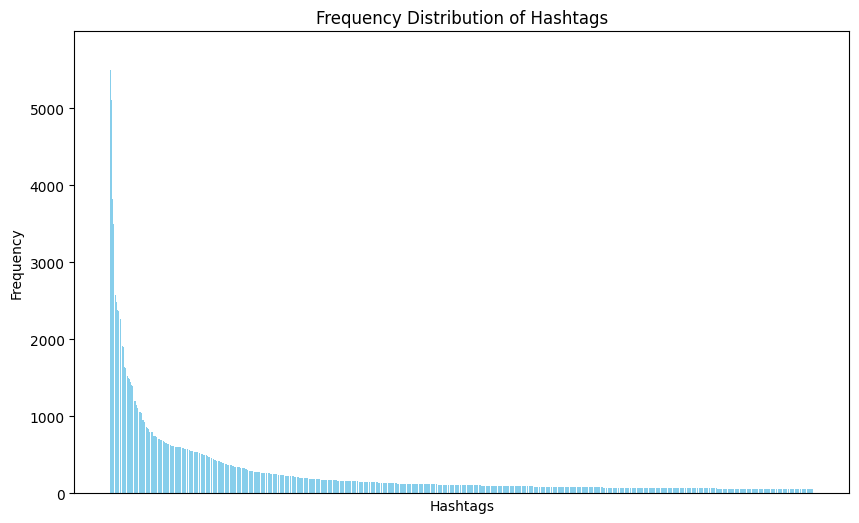

In [48]:
# Calculate the sum of each hashtag column to get the frequency
hashtag_frequencies = df_encoded.iloc[:, 16:].sum()

# Plot the frequency distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(hashtag_frequencies)), hashtag_frequencies, color='skyblue')
plt.title('Frequency Distribution of Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.xticks([], [])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 12396 (\N{HIRAGANA LETTER NU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 12377 (\N{HIRAGANA LETTER SU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 12383 (\N{HIRAGANA LETTER TA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 12368 (\N{HIRAGANA LETTER GU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 12425 (\N{HIRAGANA LETTER RA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils

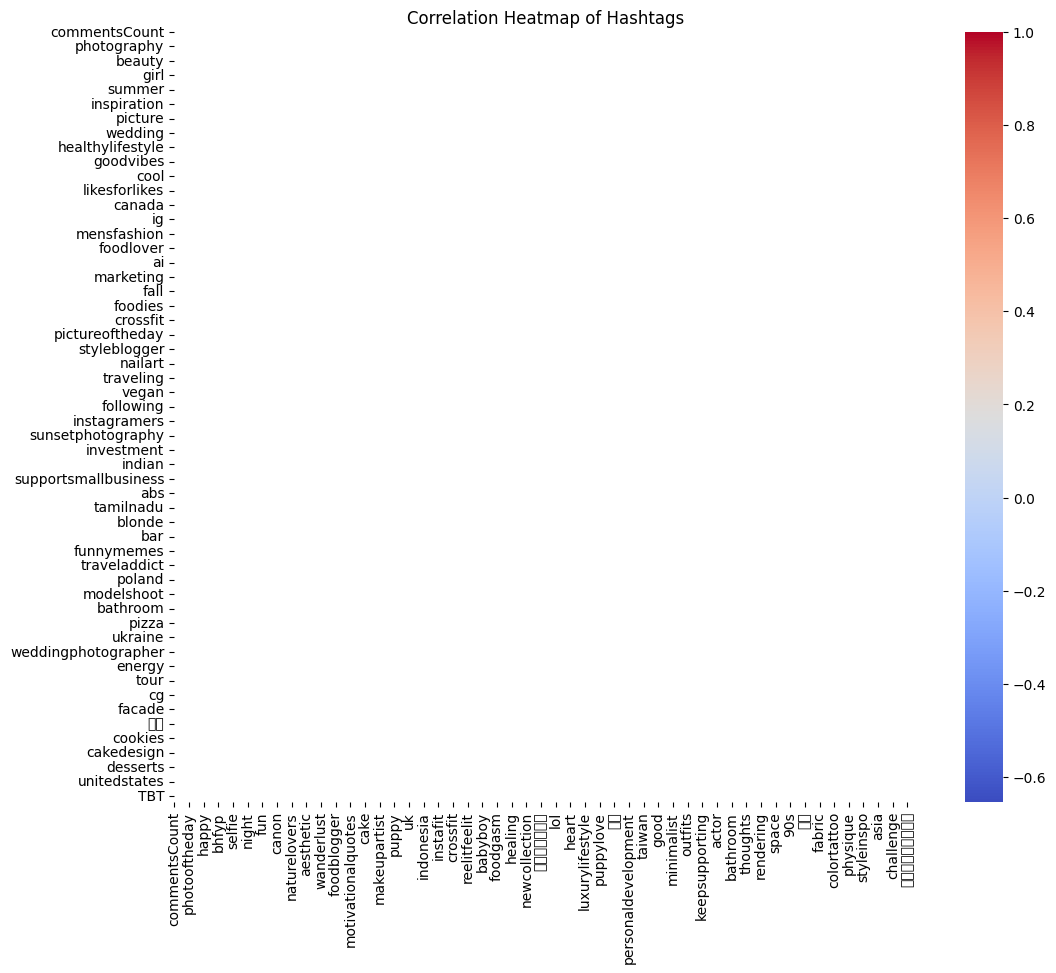

In [49]:
# Calculate correlation matrix between hashtags
correlation_matrix = df_encoded.iloc[:].corr()

# Plot the correlation matrix as a heatmap
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Hashtags')
plt.show()

In [50]:
# Features (X)
X = df_encoded.drop(columns=['likesCount30days', 'commentsCount30days'])

# Target variables (y)
y_likes = df_encoded['likesCount30days']
y_comments = df_encoded['commentsCount30days']


In [51]:
from sklearn.model_selection import train_test_split

# Step 2: Split the data into training and testing sets
X_train, X_test, y_likes_train, y_likes_test = train_test_split(X, y_likes, test_size=0.2, random_state=42)
X_train, X_test, y_comments_train, y_comments_test = train_test_split(X, y_comments, test_size=0.2, random_state=42)


In [52]:
from sklearn.linear_model import Ridge, Lasso

# Initialize Ridge regression models with regularization parameter alpha for likes and comments
ridge_likes_model = Ridge(alpha=0.1)  # You can adjust the value of alpha as needed for likes
ridge_comments_model = Ridge(alpha=0.1)  # You can adjust the value of alpha as needed for comments

# Train the Ridge regression models on the training data for likes and comments
ridge_likes_model.fit(X_train, y_likes_train)
ridge_comments_model.fit(X_train, y_comments_train)

# Initialize Lasso regression models with regularization parameter alpha for likes and comments
lasso_likes_model = Lasso(alpha=0.1)  # You can adjust the value of alpha as needed for likes
lasso_comments_model = Lasso(alpha=0.1)  # You can adjust the value of alpha as needed for comments

# Train the Lasso regression models on the training data for likes and comments
lasso_likes_model.fit(X_train, y_likes_train)
lasso_comments_model.fit(X_train, y_likes_train)


Lasso(alpha=0.1)

In [ ]:
# from sklearn.linear_model import LinearRegression

# # Instantiate the linear regression model for predicting likes count after 30 days
# model_likes = LinearRegression()

# # Train the model using the training data
# model_likes.fit(X_train_likes, y_train_likes)

# from sklearn.metrics import r2_score

# # Predicting likes count after 30 days
# y_likes_pred = model_likes.predict(X_test_likes)
# r2_likes = r2_score(y_test_likes, y_likes_pred)
# print("R-squared score for predicting likes count after 30 days:", r2_likes)


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Step 3: Initialize and train the neural network model
model = MLPRegressor(max_iter=1000)  # Increase max_iter for better convergence
model.fit(X_train, y_likes_train)  # Train the model for predicting likes count after 30 days

# Step 4: Evaluate the model's performance on the testing data for likes count
y_likes_pred = model.predict(X_test)
mse_likes = mean_squared_error(y_likes_test, y_likes_pred)
print("Mean Squared Error (MSE) for predicting likes count after 30 days:", mse_likes)



Mean Squared Error (MSE) for predicting likes count after 30 days: 1584447.4828082072


In [53]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

In [ ]:
# Calculate R-squared score for likes prediction
r2_likes = r2_score(y_likes_test, y_likes_pred)
print("R-squared score for predicting likes count after 30 days:", r2_likes)


R-squared score for predicting likes count after 30 days: -0.009426933214203848


In [ ]:
# Step 5: Train and evaluate the model for predicting comments count after 30 days
model.fit(X_train, y_comments_train)
y_comments_pred = model.predict(X_test)
mse_comments = mean_squared_error(y_comments_test, y_comments_pred)
print("Mean Squared Error (MSE) for predicting comments count after 30 days:", mse_comments)

Mean Squared Error (MSE) for predicting comments count after 30 days: 586.9828005517795


In [ ]:
# Calculate R-squared score for comments prediction
r2_comments = r2_score(y_comments_test, y_comments_pred)
print("R-squared score for predicting comments count after 30 days:", r2_comments)

R-squared score for predicting comments count after 30 days: 0.23608972122690153


In [ ]:
# prompt: train on  linear regression with accuracy for both likes and comments

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Initialize linear regression models for likes and comments
model_likes = LinearRegression()
model_comments = LinearRegression()

# Train the models on the training data
model_likes.fit(X_train, y_likes_train)
model_comments.fit(X_train, y_comments_train)

# Predict likes and comments on the test data
y_likes_pred = model_likes.predict(X_test)
y_comments_pred = model_comments.predict(X_test)

# Calculate and print the accuracy for likes and comments
accuracy_likes = r2_score(y_likes_test, y_likes_pred)
accuracy_comments = r2_score(y_comments_test, y_comments_pred)

print("Accuracy for predicting likes count after 30 days:", accuracy_likes)
print("Accuracy for predicting comments count after 30 days:", accuracy_comments)

# Calculate and print the mean squared error for likes and comments
mse_likes = mean_squared_error(y_likes_test, y_likes_pred)
mse_comments = mean_squared_error(y_comments_test, y_comments_pred)

print("Mean Squared Error (MSE) for predicting likes count after 30 days:", mse_likes)
print("Mean Squared Error (MSE) for predicting comments count after 30 days:", mse_comments)


Accuracy for predicting likes count after 30 days: -0.03195443708959789
Accuracy for predicting comments count after 30 days: 0.2457601933061856
Mean Squared Error (MSE) for predicting likes count after 30 days: 1619807.790359805
Mean Squared Error (MSE) for predicting comments count after 30 days: 579.5520839591547


In [ ]:
# prompt: train algorithm with random forest

from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data for predicting likes count after 30 days
random_forest_model.fit(X_train, y_likes_train)

# Predict likes count after 30 days using the trained model
y_likes_pred = random_forest_model.predict(X_test)

# Calculate and print the R-squared score for likes prediction
r2_likes = r2_score(y_likes_test, y_likes_pred)
print("R-squared score for predicting likes count after 30 days using Random Forest:", r2_likes)

# Train the model on the training data for predicting comments count after 30 days
random_forest_model.fit(X_train, y_comments_train)

# Predict comments count after 30 days using the trained model
y_comments_pred = random_forest_model.predict(X_test)

# Calculate and print the R-squared score for comments prediction
r2_comments = r2_score(y_comments_test, y_comments_pred)
print("R-squared score for predicting comments count after 30 days using Random Forest:", r2_comments)


R-squared score for predicting likes count after 30 days using Random Forest: -0.7016204377254931
R-squared score for predicting comments count after 30 days using Random Forest: 0.2744854073403268


In [ ]:
# prompt: train algorthm with decision tree

from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data for predicting likes count after 30 days
decision_tree_model.fit(X_train, y_likes_train)

# Predict likes count after 30 days using the trained model
y_likes_pred = decision_tree_model.predict(X_test)

# Calculate and print the R-squared score for likes prediction
r2_likes = r2_score(y_likes_test, y_likes_pred)
print("R-squared score for predicting likes count after 30 days using Decision Tree:", r2_likes)

# Train the model on the training data for predicting comments count after 30 days
decision_tree_model.fit(X_train, y_comments_train)

# Predict comments count after 30 days using the trained model
y_comments_pred = decision_tree_model.predict(X_test)

# Calculate and print the R-squared score for comments prediction
r2_comments = r2_score(y_comments_test, y_comments_pred)
print("R-squared score for predicting comments count after 30 days using Decision Tree:", r2_comments)


R-squared score for predicting likes count after 30 days using Decision Tree: -2.5233338557346645
R-squared score for predicting comments count after 30 days using Decision Tree: -0.7921946621510838


In [ ]:
# prompt: save file in h5 format

df_encoded.to_hdf('data.h5', key='df', mode='w')


In [ ]:
# prompt: test the data.h5 model on this sample data -# Sample data
# profile_name = "patanjali"
# followers = 1134619
# following = 915
# post_time = "2024-02-17T05:42:07.000Z"

import pandas as pd
import h5py

# Load the model from the HDF5 file
with h5py.File('data.h5', 'r') as f:
    df = pd.read_hdf(f, key='df')

# Preprocess the sample data
sample_data = {
    'profileName': [profile_name],
    'followers': [followers],
    'following': [following],
    'postTime': [post_time],
}

sample_df = pd.DataFrame(sample_data)

# Extract features from the sample data
X_sample = sample_df.drop(columns=['profileName', 'postTime'])

# Make predictions on the sample data
y_likes_pred = model.predict(X_sample)
y_comments_pred = model.predict(X_sample)

# Print the predicted likes and comments count
print("Predicted likes count after 30 days:", y_likes_pred[0])
print("Predicted comments count after 30 days:", y_comments_pred[0])


NotImplementedError: Support for generic buffers has not been implemented.